# Bounding the flux landscape

**What's in this notebook?** This notebook reads in the data obtained in https://inspirehep.net/literature/2865868 and generates a couple of plots.


(*Created:* Andreas Schachner, January 6, 2025)

## Imports

### Install

In [1]:
!pip install --quiet seaborn

### General imports

In [1]:
import sys, os, warnings, glob, pickle, gzip
import numpy as np
from tqdm.auto import tqdm
warnings.filterwarnings('ignore')

import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib as mpl
cmap=sn.color_palette("viridis", as_cmap=True)


def load_zipped_pickle(filen):
    r"""
    **Description:**
    Returns content of zipped pickle file.
    
    
    Args:
       filen (string): Filename of zipped file to be read.
        
    Returns:
       ArrayLike/dict: Data contained in file.
    
    """
    
    with gzip.open(filen, 'rb') as f:
        loaded_object = pickle.load(f)
            
    f.close()
            
    return loaded_object

def save_zipped_pickle(obj, filen, protocol=-1):
    r"""
    **Description:**
    Saves data in a zipped pickle file.
    
    
    Args:
       obj (array/dict): Data to be stored in file.
       filen (string): Filename of file to be read.
        
    Returns:
        
    
    """
    with gzip.open(filen, 'wb') as f:
        pickle.dump(obj, f, protocol)
        
    f.close()

## Loading datasets A&B

In [2]:
datsA = []
nfsA = []
files = glob.glob("dataset_A/*")
for file in tqdm(files):
    dat = load_zipped_pickle(file)
    
    # Get Nflux
    ind1 = file.index("nflux")
    ind2 = file.index(".p")
    nf = int(file[ind1+6:ind2])
    nf = np.ones(len(dat))*nf
    
    if len(datsA)==0:
        datsA = dat
        nfsA = nf
    else:
        datsA = np.append(datsA,dat,axis=0)
        nfsA = np.append(nfsA,nf)
        
datsB = load_zipped_pickle("./dataset_B.p")
nfsB = load_zipped_pickle("./dataset_B_Nflux.p")
datsA.shape,datsB.shape

  0%|          | 0/31 [00:00<?, ?it/s]

((5140872, 18), (12196, 18))

The arrays `nfsA` and `nfsB` contain the values of $N_{flux}$, while `datsA` and `datsB` the VEVs and flux choices for datasets A and B respectively. Specifically, we have e.g. for dataset B (similarly for dataset A):

In [3]:
# Get flux choices
fluxes = datsB[:,6:]
# Get RR fluxes
f = fluxes[:,:6]
# Get NSNS fluxes
h = fluxes[:,6:]

# Get VEVs
vevs = datsB[:,:6]
# Get z1
z1 = vevs[:,0]+1j*vevs[:,1]
# Get z2
z2 = vevs[:,2]+1j*vevs[:,3]
# Get axio-dilaton
tau = vevs[:,4]+1j*vevs[:,5]

## Reproducing Figure 2: Plot $\tau$ for dataset A

  0%|          | 0/6 [00:00<?, ?it/s]

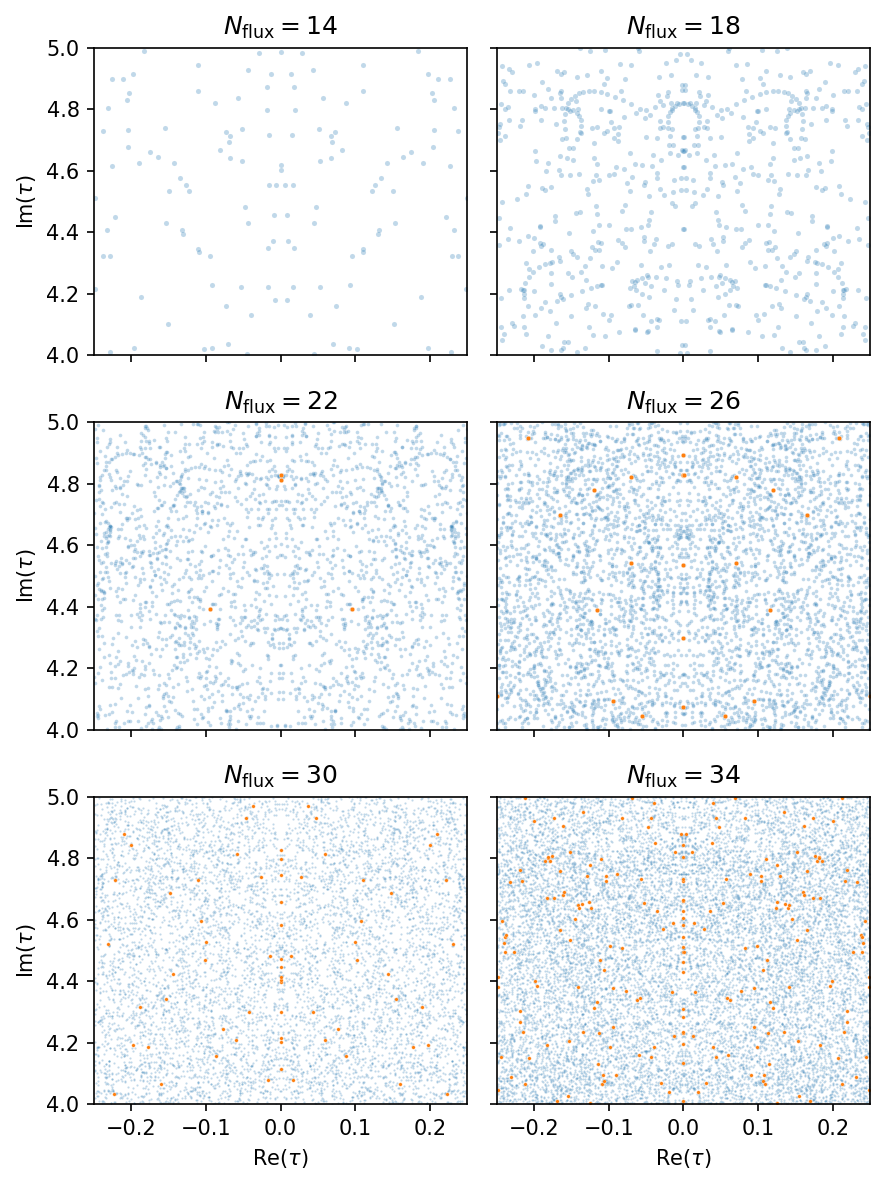

In [4]:
fig, ax = plt.subplots(3, 2,figsize=(6,8),dpi=150)

dats = datsA
nfs = nfsA

fs=14
ps = 0.1

minRe = -0.25
maxRe = 0.25
minIm = 4
maxIm = 5

cc=1
for nf in tqdm([14,18,22,26,30,34]):
    flag = (nfs==nf)&(dats[:,4]>=minRe)&(dats[:,4]<=maxRe)&(dats[:,5]>=minIm)&(dats[:,5]<=maxIm)
    dats0 = dats[flag]
    
    if nf<=20:
        
        i=0
        if nf==14:
            j=0
            ps=10
        if nf==18:
            ps=10
            j=1
            
        ps=6
        
    elif nf<=26 and nf>20:
        
        
        i=1
        if nf==22:
            j=0
            ps=1
        if nf==26:
            ps=0.5
            j=1
            ps=1
        
        ps=3
            
    elif nf<=34 and nf>28:
        ps=0.1
        
        i=2
        if nf==30:
            j=0
        
        if nf==34:
            j=1
            
        ps=1
   
    
    sn.scatterplot(x=dats0[:,4].real,y=dats0[:,5].real,s=ps,ax=ax[i,j],alpha=0.15)
    
    sols,counts = np.unique(np.around(dats0[:,4:6],3),axis=0,return_counts=True)
    
    if np.min(counts)==2:
        flag = counts>np.min(counts)
    else:
        flag = counts>np.min(counts)+1
    sols0 = sols[flag]
    
    if len(sols0)==0:
        sols0 = np.array([[-10,-10]])
        
    sn.scatterplot(x=sols0[:,0].real,y=sols0[:,1].real,s=ps+2,ax=ax[i,j])
    
    ax[i,j].set_xlim(minRe,maxRe)
    ax[i,j].set_ylim(minIm,maxIm)
    
    ax[i,j].set_title(r"$N_{\mathrm{flux}}=$"+f"{nf}")
    
    xticks = [-0.2,-0.1,0,0.1,0.2]
    ax[i,j].set_xticks(xticks)
    
    if i==2:
        ax[i,j].set_xlabel(r"Re$(\tau)$")
    else:
        ax[i,j].set_xlabel(r"")
        ax[i,j].set(xticklabels=[])  # remove the tick labels
        ax[i,j].set(xlabel=None)
    
    if j==0:
        ax[i,j].set_ylabel(r"Im$(\tau)$")
    else:
        ax[i,j].set_ylabel(r"")
        ax[i,j].set(yticklabels=[])  # remove the tick labels
        ax[i,j].set(ylabel=None)
        
    
    
plt.tight_layout()
#plt.savefig("./figs/tau_struct.pdf",format="pdf",dpi=200, bbox_inches='tight')
plt.show();

## Reproducing Figure 3: Plot datset B

In [9]:
dats = load_zipped_pickle("./dataset_B.p")
nfs = load_zipped_pickle("./dataset_B_Nflux.p")
Ws = load_zipped_pickle("./dataset_B_W.p")

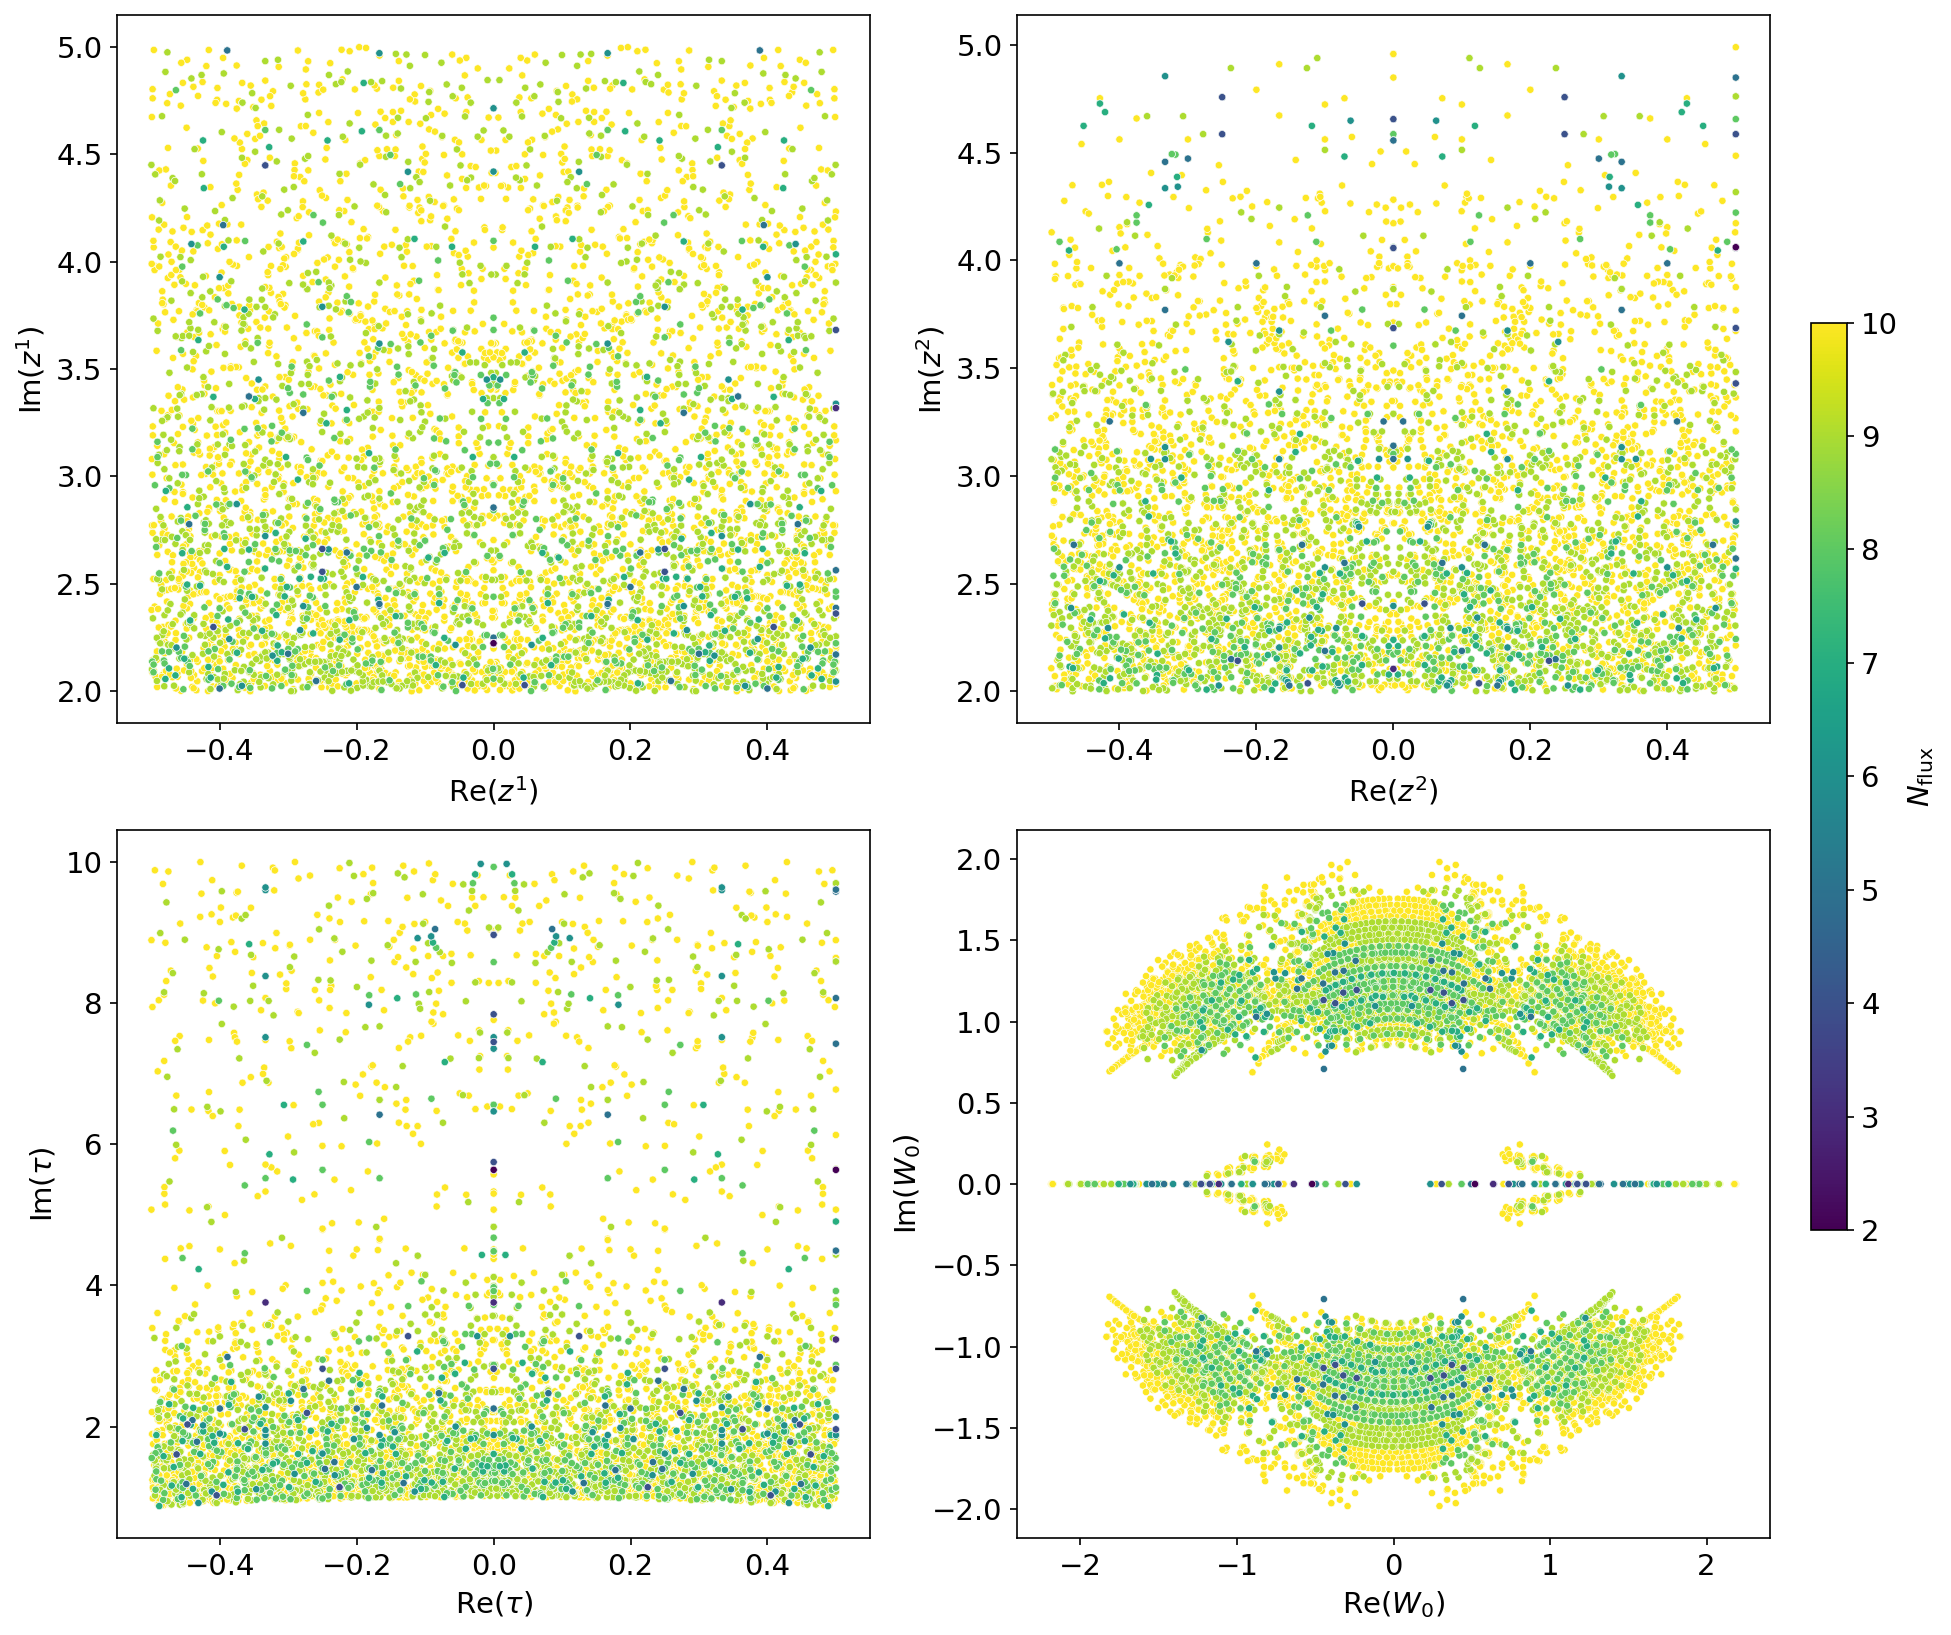

In [10]:
fig, ax = plt.subplots(2, 2,figsize=(12,11),dpi=150)

flag = np.argsort(nfs)[::-1]
nfs0 = nfs[flag]
dats0 = dats[flag]
Ws0 = Ws[flag]

fs=14
ps = 12
sn.scatterplot(x=dats0[:,0],y=dats0[:,1],ax=ax[0,0],s=ps,hue=nfs0,palette=cmap)
sn.scatterplot(x=dats0[:,2],y=dats0[:,3],ax=ax[0,1],s=ps,hue=nfs0,palette=cmap)

sn.scatterplot(x=dats0[:,4],y=dats0[:,5],ax=ax[1,0],s=ps,hue=nfs0,palette=cmap)

sn.scatterplot(x=Ws0.real,y=Ws0.imag,ax=ax[1,1],s=ps,hue=nfs0,palette=cmap)


ax[0,0].set_xlabel(r"Re$(z^1)$",fontsize=fs)
ax[0,0].set_ylabel(r"Im$(z^1)$",fontsize=fs)
ax[0,0].tick_params(axis='both', which='major', labelsize=fs)
ax[0,0].tick_params(axis='both', which='minor', labelsize=fs-2)

ax[0,1].set_xlabel(r"Re$(z^2)$",fontsize=fs)
ax[0,1].set_ylabel(r"Im$(z^2)$",fontsize=fs)
ax[0,1].tick_params(axis='both', which='major', labelsize=fs)
ax[0,1].tick_params(axis='both', which='minor', labelsize=fs-2)

ax[1,0].set_xlabel(r"Re$(\tau)$",fontsize=fs)
ax[1,0].set_ylabel(r"Im$(\tau)$",fontsize=fs)
ax[1,0].tick_params(axis='both', which='major', labelsize=fs)
ax[1,0].tick_params(axis='both', which='minor', labelsize=fs-2)

ax[1,1].set_xlabel(r"Re$(W_0)$",fontsize=fs)
ax[1,1].set_ylabel(r"Im$(W_0)$",fontsize=fs)
ax[1,1].tick_params(axis='both', which='major', labelsize=fs)
ax[1,1].tick_params(axis='both', which='minor', labelsize=fs-2)

ax[0,0].legend("",frameon=False)
ax[1,0].legend("",frameon=False)
ax[0,1].legend("",frameon=False)
ax[1,1].legend("",frameon=False)

norm = plt.Normalize(min(nfs0),max(nfs0))
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbaxes = fig.add_axes([1.01, 0.25, 0.02, 0.55])  
clb = fig.colorbar(sm, label=r"$N_{\mathrm{flux}}$", cax=cbaxes,location='right')#, shrink=0.8
clb.set_label(label=r"$N_{\mathrm{flux}}$",size=fs)
clb.ax.tick_params(labelsize=fs)
ticklabs = clb.ax.get_yticklabels()
clb.ax.set_yticklabels(ticklabs, fontsize=fs)

plt.tight_layout()

#plt.savefig("./figs/moduli_plot_overview.pdf",format="pdf",dpi=200, bbox_inches='tight')
plt.show();